In [1]:
import os
import anndata as ad
import scanpy as sc
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import scvi
import scanpy.external as sce
import pertpy as pt
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

/home/icb/martin.meinel/miniconda3/envs/pbeqtl_39/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
mf_adata = sc.read_h5ad("/Safari/sc/Haniffa/CTCL_all_final_portal_tags.h5ad")

In [ ]:
schabitz_adata = sc.read_h5ad("/Safari/sc/sc_QC_DD_normed_hvg_cc_BCsamplescVI_annotated_v3.h5")

In [4]:
pso_ad_adata = schabitz_adata[schabitz_adata.obs.disease.isin(["Pso", "AE"]),].copy()

In [5]:
mf_adata.obs.head()

,tissue,sex,study,donor,tech,cell_type,stage,n_counts
AAACCTGAGAAGCCCA-0_CTCL1_CTCL1_CTCL1,Epidermis,F,Sanger_Ncl_Fresh,CTCL1,10x,Differentiated_KC*,IIB,6708.0
AAACCTGAGAATGTTG-0_CTCL1_CTCL1_CTCL1,Epidermis,F,Sanger_Ncl_Fresh,CTCL1,10x,Differentiated_KC*,IIB,5956.0
AAACCTGAGCCAACAG-0_CTCL1_CTCL1_CTCL1,Epidermis,F,Sanger_Ncl_Fresh,CTCL1,10x,tumor_cell,IIB,851.0
AAACCTGAGCGTTCCG-0_CTCL1_CTCL1_CTCL1,Epidermis,F,Sanger_Ncl_Fresh,CTCL1,10x,Undifferentiated_KC,IIB,1092.0
AAACCTGAGTACGTTC-0_CTCL1_CTCL1_CTCL1,Epidermis,F,Sanger_Ncl_Fresh,CTCL1,10x,Differentiated_KC,IIB,21186.0


In [6]:
mf_adata.obs.stage

AAACCTGAGAAGCCCA-0_CTCL1_CTCL1_CTCL1               IIB
AAACCTGAGAATGTTG-0_CTCL1_CTCL1_CTCL1               IIB
AAACCTGAGCCAACAG-0_CTCL1_CTCL1_CTCL1               IIB
AAACCTGAGCGTTCCG-0_CTCL1_CTCL1_CTCL1               IIB
AAACCTGAGTACGTTC-0_CTCL1_CTCL1_CTCL1               IIB
                                                  ... 
TTTGTGAGTAGTCATCATGTTGAC-1_CTCL18_CTCL18_CTCL18     IV
TTTGTGAGTATAGTGGATGTTGAC-1_CTCL18_CTCL18_CTCL18     IV
TTTGTGAGTGACACAAATGTTGAC-1_CTCL18_CTCL18_CTCL18     IV
TTTGTGAGTGCTCATGATGTTGAC-1_CTCL18_CTCL18_CTCL18     IV
TTTGTGAGTTCAAGGAATGTTGAC-1_CTCL18_CTCL18_CTCL18     IV
Name: stage, Length: 419579, dtype: category
Categories (7, object): ['IA', 'IB', 'IIA', 'IIB', 'IIIB', 'IV', 'IVA2']

In [7]:
mf_adata.obs.study.unique()

['Sanger_Ncl_Fresh', 'MDA', 'PKU', 'Sanger_Ncl_FFPE']
Categories (4, object): ['MDA', 'PKU', 'Sanger_Ncl_FFPE', 'Sanger_Ncl_Fresh']

In [8]:
mf_adata.obs.donor.unique()

['CTCL1', 'CTCL5', 'CTCL6', 'CTCL7', 'CTCL8', ..., 'CTCL13', 'CTCL11', 'CTCL14', 'CTCL17', 'CTCL18']
Length: 36
Categories (36, object): ['CTCL1', 'CTCL2', 'CTCL3', 'CTCL4', ..., 'PT52', 'PT53', 'PT55', 'PT56']

In [9]:
mf_adata_early = mf_adata[(mf_adata.obs["tissue"] == "whole_skin") & (mf_adata.obs["stage"].isin(["IA", "IB", "IIA"])),:].copy()

In [10]:
print(mf_adata_early.obs.donor.unique().tolist())

['PT50', 'MF26', 'MF22', 'MF14', 'MF15', 'CTCL9', 'CTCL15', 'CTCL10', 'CTCL16', 'CTCL11', 'CTCL14']


In [11]:
mf_adata_early.obs.stage.unique()

['IB', 'IIA', 'IA']
Categories (3, object): ['IA', 'IB', 'IIA']

In [12]:
np.min(mf_adata_early.X)

np.float32(0.0)

In [13]:
schabitz_adata.obs.cell_types

UMI
CTATCTAAGTTTGCTG      Proliferating_KC
GTAACACCACTTTAGG      Proliferating_KC
CTCATTATCCTGTTAT                   DC1
GGGCTACGTCTAGGTT      Proliferating_KC
AAGCATCTCGGACCAC      Proliferating_KC
                            ...       
CGTAAGTCATAGATCC             Mast_cell
AGGTCTATCCCATTTA-1    Proliferating_KC
CTGGCAGCACTGCGTG                    Tc
TTCTAGTTCCGTGTAA                   DC1
AAGGTAATCCGTAGTA                    Th
Name: cell_types, Length: 123343, dtype: category
Categories (42, object): ['DC1', 'DC2', 'Differentiated_KC', 'Differentiated_KC*', ..., 'VE3', 'moDC_1', 'moDC_2', 'moDC_3']

In [ ]:
def clean_anndata_and_scrublet(adata_before: sc.AnnData, mf=False) -> sc.AnnData:
    if mf:
        raw_counts = adata_before.layers["raw_counts"].copy()
        obs_metadata = adata_before.obs.copy()
        colnames_keep = ['tissue', 'sex', 'study', 'donor', 'tech', 'cell_type', 'stage']
        drop_cols= [col for col in obs_metadata.columns if col not in colnames_keep]
        obs_metadata.rename(columns={"donor":"sample", "cell_type": "cell_types"}, inplace=True)
        obs_metadata["disease"] = "MF"
    else:
    # Remove the anndata from before and start processing one more time
        raw_counts = adata_before.layers["counts"].copy()
        obs_metadata = adata_before.obs.copy()
        colnames_keep = ["sample", "Pseudo_ID", "Biobank_ID", "sequencing_batch", "disease", "cell_types"]
        drop_cols = [col for col in obs_metadata.columns if col not in colnames_keep]
    obs_metadata.drop(columns = drop_cols, inplace=True)
    var_features = adata_before.var.copy()
    adata_clean = ad.AnnData(
    X = raw_counts,
    obs = obs_metadata,
    var = var_features)
    adata_clean.layers["counts"] = adata_clean.X.copy()

    # Introduce QC and 
    adata_clean = applyQC(adata_clean)
    adata_clean = adata_clean[(adata_clean.obs["n_genes"] > 500) & (adata_clean.obs["n_counts"] > 600) & (adata_clean.obs["n_counts"] < 25_000) & (adata_clean.obs["mt_frac"] < 0.25) ,].copy()
    sc.pp.filter_genes(adata_clean, min_cells=3)
    
    sample_counts = adata_clean.obs['sample'].value_counts()
    # 2. Print the result
    print(sample_counts)
    
    # Filtering for doublets
    adata_clean.obs["scrublet_score"] = np.nan
    adata_clean.obs["predicted_doublet"] = False
    print(adata_clean.obs.columns)
    for sample_id in adata_clean.obs["sample"].unique():
        adata_sample = adata_clean[adata_clean.obs["sample"] == sample_id,].copy()
        sc.pp.scrublet(adata_sample)
        sample_indices = adata_sample.obs_names
        adata_clean.obs.loc[sample_indices, "doublet_score"] = adata_sample.obs["doublet_score"]
        adata_clean.obs.loc[sample_indices, "predicted_doublet"]  = adata_sample.obs["predicted_doublet"]
        del adata_sample
    
    adata_clean.obsm = {}
    adata_clean.uns = {}
    return adata_clean
    

In [15]:
def applyQC(adata)->sc.AnnData:
    adata2 = adata.copy()
    # Number of counts per cell
    adata2.obs['n_counts'] = adata2.X.sum(1)
    # number of genes per cell
    adata2.obs['n_genes'] = (adata2.X > 0).sum(1)
    mt_gene_mask = [gene.startswith('MT-') for gene in adata2.var_names]
    adata2.obs['mt_counts'] = adata2.X[:, mt_gene_mask].sum(1)
    adata2.obs['mt_frac'] = adata2.obs['mt_counts'] / adata2.obs['n_counts']
    return adata2

In [16]:
pso_eczema_clean = clean_anndata_and_scrublet(pso_ad_adata)

sample
MUC29514    7569
MUC29513    7267
MUC29526    5999
MUC29520    5639
MUC29524    5551
MUC29528    4999
MUC29525    4653
MUC29519    4125
MUC29518    4050
MUC29509    3812
MUC29521    3765
MUC29508    3439
MUC26159    2900
MUC29523    2882
MUC29517    2714
MUC14402    1842
MUC26158    1518
MUC26160    1004
Name: count, dtype: int64
Index(['sample', 'Pseudo_ID', 'Biobank_ID', 'sequencing_batch', 'disease',
       'cell_types', 'n_counts', 'n_genes', 'mt_counts', 'mt_frac',
       'scrublet_score', 'predicted_doublet'],
      dtype='object')


In [17]:
mf_adata_clean = clean_anndata_and_scrublet(mf_adata_early, mf=True)

sample
CTCL9     5975
MF14      5179
PT50      4562
CTCL16    3771
MF15      2331
CTCL10    2310
MF26      2105
MF22      2009
CTCL14    1356
CTCL11     797
CTCL15     456
Name: count, dtype: int64
Index(['tissue', 'sex', 'study', 'sample', 'tech', 'cell_types', 'stage',
       'disease', 'n_counts', 'n_genes', 'mt_counts', 'mt_frac',
       'scrublet_score', 'predicted_doublet'],
      dtype='object')


In [18]:
# Remove doublets
pso_eczema_clean = pso_eczema_clean[pso_eczema_clean.obs["predicted_doublet"] == False,].copy()
mf_adata_clean = mf_adata_clean[mf_adata_clean.obs["predicted_doublet"] == False,].copy()

In [19]:
mf_adata_clean.obs.columns

Index(['tissue', 'sex', 'study', 'sample', 'tech', 'cell_types', 'stage',
       'disease', 'n_counts', 'n_genes', 'mt_counts', 'mt_frac',
       'scrublet_score', 'predicted_doublet', 'doublet_score'],
      dtype='object')

In [20]:
pso_eczema_clean.obs.columns

Index(['sample', 'Pseudo_ID', 'Biobank_ID', 'sequencing_batch', 'disease',
       'cell_types', 'n_counts', 'n_genes', 'mt_counts', 'mt_frac',
       'scrublet_score', 'predicted_doublet', 'doublet_score'],
      dtype='object')

In [21]:
print(mf_adata_clean.obs.predicted_doublet.sum())
print(pso_eczema_clean.obs.predicted_doublet.sum())

0
0


In [22]:
# Check for overlapping genes
genes_mf = set(mf_adata_clean.var_names)
genes_psor_eczema = set(pso_eczema_clean.var_names)

# 2. Calculate the intersection
shared_genes = genes_mf.intersection(genes_psor_eczema)

# 3. Calculate the number of lost/unique genes
num_mf_only = len(genes_mf - shared_genes)
num_psor_eczema_only = len(genes_psor_eczema - shared_genes)

print(f"Shared genes: {len(shared_genes)}")
                           

Shared genes: 15447


In [23]:
adata_combined = ad.concat([pso_eczema_clean, mf_adata_clean], join='inner', label='dataset_batch',
                                     keys=['Psoriasis_Eczema', 'MF'])

In [33]:
def normalize_data(adata: sc.AnnData) -> sc.AnnData:
    adata2 = adata.copy()
    if "counts" not in adata2.layers:
        adata2.layers["counts"] = adata2.X.copy()
    # Normalizing to CPM counts
    sc.pp.normalize_total(adata2, target_sum=1e4)
    # Logarithmize the data
    sc.pp.log1p(adata2)
    adata2.raw = adata2.copy()
    return adata2

In [36]:
adata_combined = normalize_data(adata_combined)

In [37]:
sc.pp.highly_variable_genes(adata_combined, flavor="cell_ranger", n_top_genes=4000, batch_key="sample")
sc.pp.scale(adata_combined, max_value=10)
sc.tl.pca(adata_combined, mask_var="highly_variable", svd_solver="arpack")

/home/icb/martin.meinel/miniconda3/envs/pbeqtl_39/lib/python3.12/functools.py:909: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


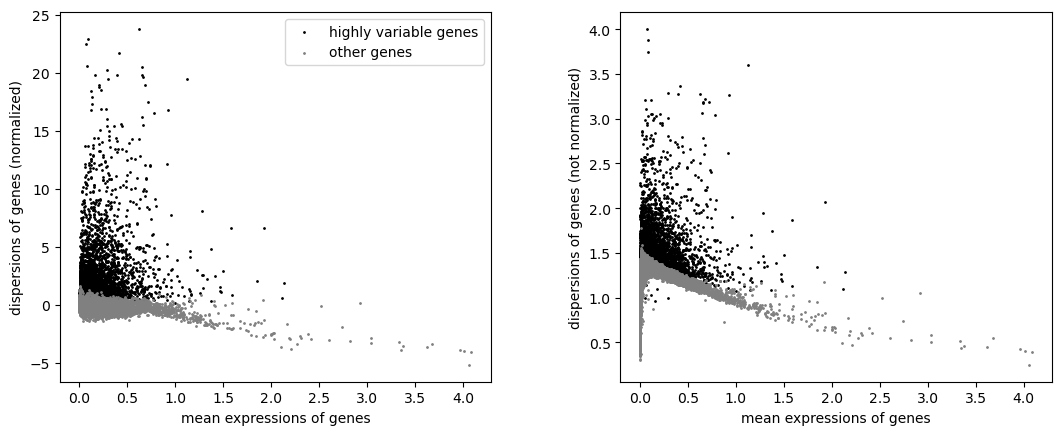

In [38]:
sc.pl.highly_variable_genes(adata_combined)

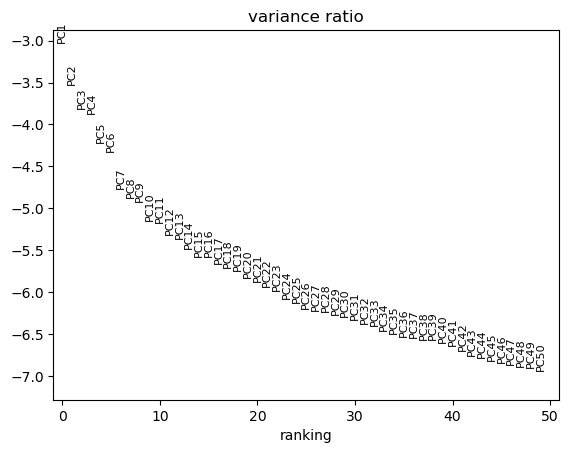

In [39]:
sc.pl.pca_variance_ratio(adata_combined, n_pcs=50, log=True)

In [40]:
# Harmony
sce.pp.harmony_integrate(adata_combined, key="sample")

2025-11-06 23:12:50,562 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-11-06 23:12:55,966 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-11-06 23:12:56,298 - harmonypy - INFO - Iteration 1 of 10
2025-11-06 23:13:20,035 - harmonypy - INFO - Iteration 2 of 10
2025-11-06 23:13:43,219 - harmonypy - INFO - Iteration 3 of 10
2025-11-06 23:14:07,009 - harmonypy - INFO - Iteration 4 of 10
2025-11-06 23:14:30,173 - harmonypy - INFO - Iteration 5 of 10
2025-11-06 23:14:53,847 - harmonypy - INFO - Iteration 6 of 10
2025-11-06 23:15:16,995 - harmonypy - INFO - Iteration 7 of 10
2025-11-06 23:15:28,599 - harmonypy - INFO - Iteration 8 of 10
2025-11-06 23:15:40,687 - harmonypy - INFO - Iteration 9 of 10
2025-11-06 23:15:51,799 - harmonypy - INFO - Converged after 9 iterations


In [41]:
sc.pp.neighbors(adata_combined, use_rep="X_pca_harmony")
sc.tl.umap(adata_combined)

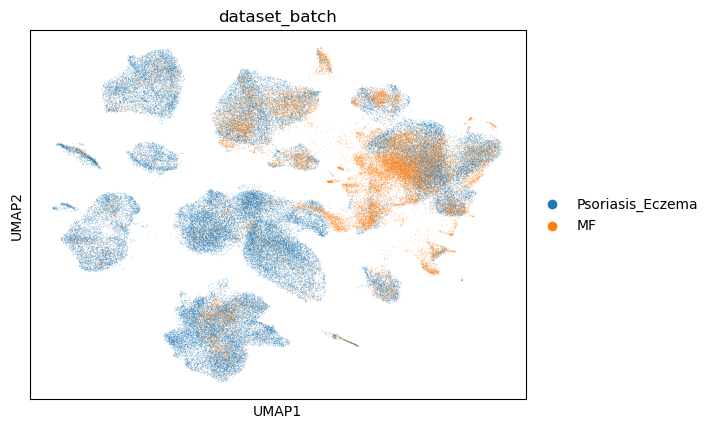

In [45]:
sc.pl.umap(adata_combined, color="dataset_batch", alpha=0.5)

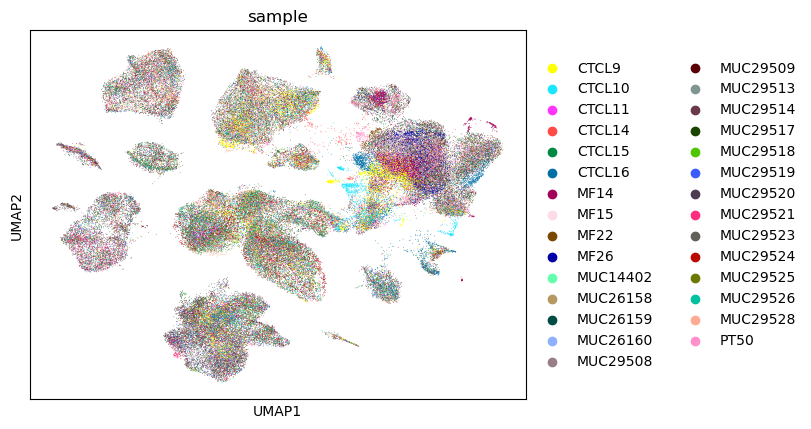

In [46]:
sc.pl.umap(adata_combined, color="sample")

In [ ]:
sc.write("/Safari/sc/combined_adata_haniffa_mf_ad_pso_harmony.h5ad", adata_combined, compression="gzip")